In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import datetime

import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

In [14]:
# Import weather data from .txt file, skip first two rows
df = pd.read_csv("all_data_nov_22.txt", header = None, skiprows = 2, parse_dates = [[0, 1]], 
                     dayfirst = True, sep = "\t", na_values = "---")
df.head()

,0_1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,2021-02-15 08:30:00,8.9,8.9,8.6,83.0,6.2,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2044,702,1,100.0,30
1,2021-02-15 09:00:00,9.2,9.2,8.9,83.0,6.4,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2045,702,1,100.0,30
2,2021-02-15 09:30:00,9.1,9.2,9.0,84.0,6.5,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.2,9.65,1.2045,702,1,100.0,30
3,2021-02-15 10:00:00,9.0,9.2,8.9,84.0,6.4,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,703,1,100.0,30
4,2021-02-15 10:30:00,8.6,8.9,8.6,88.0,6.7,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,702,1,100.0,30


In [15]:
# Replace headers
header = ['DateTime', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.', 'Wind Speed',
 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir', 'Wind Chill', 'Heat Index', 'THW Index',
 'Bar', 'Rain', 'Rain Rate', 'Heat D-D', 'Cool D-D', 'In Temp', 'In Hum', 'In Dew',
 'In Heat', 'In EMC', 'In Air Density', 'Wind Samp', 'Wind Tx', 'ISS Recept', 'Arc. Int.']

df.columns = header
df.head()
# df.dtypes
# Other values
# Solar Rad.', 'Solar Energy', 'Hi Solar Rad.', 'UV Index', 'UV Dose', 'Hi UV', 

,DateTime,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,Hi Speed,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,2021-02-15 08:30:00,8.9,8.9,8.6,83.0,6.2,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2044,702,1,100.0,30
1,2021-02-15 09:00:00,9.2,9.2,8.9,83.0,6.4,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.1,9.65,1.2045,702,1,100.0,30
2,2021-02-15 09:30:00,9.1,9.2,9.0,84.0,6.5,0.0,NaN,0.0,0.0,...,15.2,51,5.1,14.2,9.65,1.2045,702,1,100.0,30
3,2021-02-15 10:00:00,9.0,9.2,8.9,84.0,6.4,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,703,1,100.0,30
4,2021-02-15 10:30:00,8.6,8.9,8.6,88.0,6.7,0.0,NaN,0.0,0.0,...,15.2,52,5.4,14.2,9.76,1.2045,702,1,100.0,30


In [16]:
# Resample by week
psw = df.resample('W', on = 'DateTime')['Temp Out'].mean()

# Turn resample series into df
dfw = pd.DataFrame((list(zip(psw.index, psw))), columns =['Week', 'Average Temperature'])

# Tidy up week names
dfw['Week'] = dfw['Week'].dt.date

dfw.head()

,Week,Average Temperature
0,2021-02-21,8.018495
1,2021-02-28,8.215179
2,2021-03-07,4.883631
3,2021-03-14,6.197024
4,2021-03-21,7.633333


In [17]:
dfw.to_csv('temperature_weeks.csv')

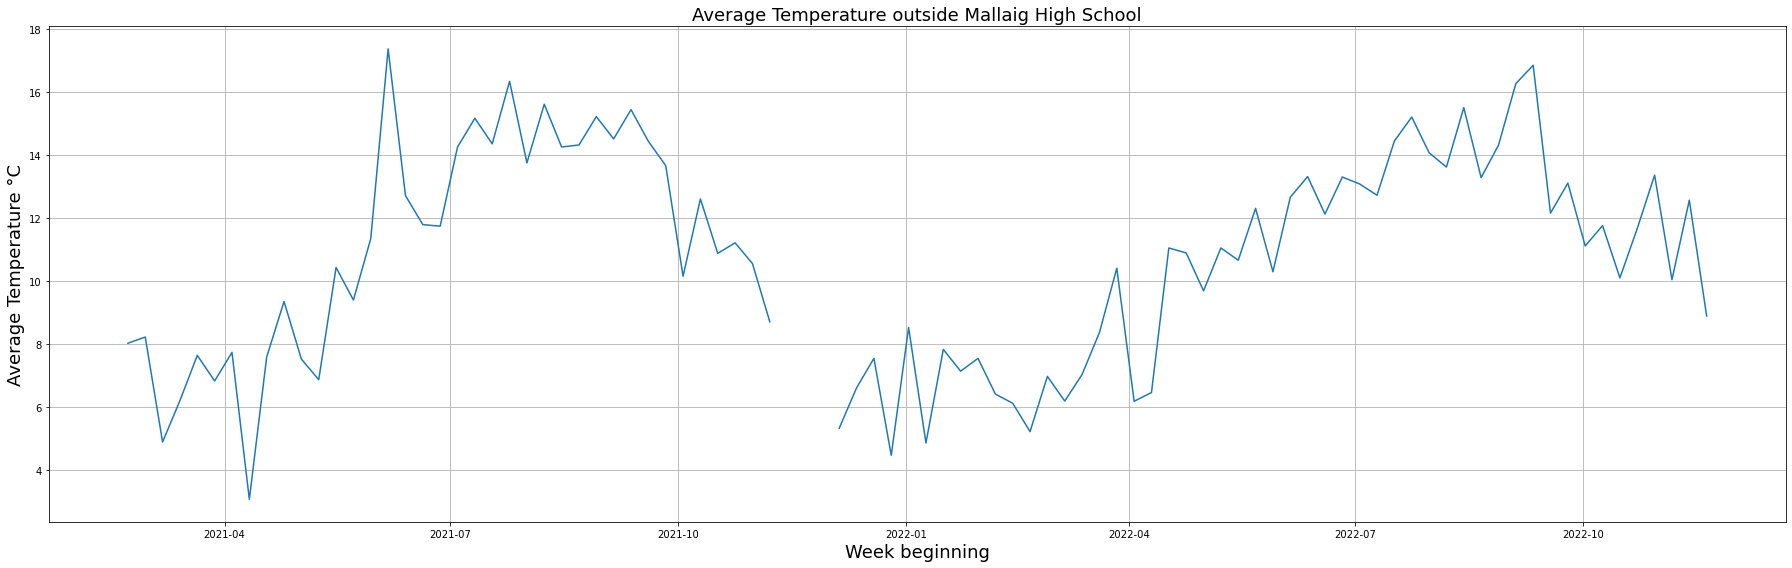

In [18]:
# Plot bar chart
dfw.plot.line(x = 'Week', y = 'Average Temperature', figsize=(25,8), grid = True, legend=False)

plt.title("Average Temperature outside Mallaig High School", fontsize = 18)
plt.xlabel("Week beginning", fontsize = 18)
plt.ylabel("Average Temperature °C", fontsize = 18)

plt.tight_layout()

plt.savefig('mhs_average_temperature_week', dpi = 200)

In [19]:
# Resample by month
psm = df.resample('M', on = 'DateTime')['Temp Out'].mean()

# Turn resample series into df
dfm = pd.DataFrame((list(zip(psm.index, psm))), columns =['Month', 'Average Temperature'])

# Tidy up week names
dfm['Month'] = dfm['Month'].dt.month_name() + ' ' + dfm['Month'].dt.year.astype(str)

dfm.head()

,Month,Average Temperature
0,February 2021,8.119389
1,March 2021,6.650875
2,April 2021,6.824306
3,May 2021,9.647715
4,June 2021,12.761715


In [20]:
dfm.to_csv('temperature_months.csv')

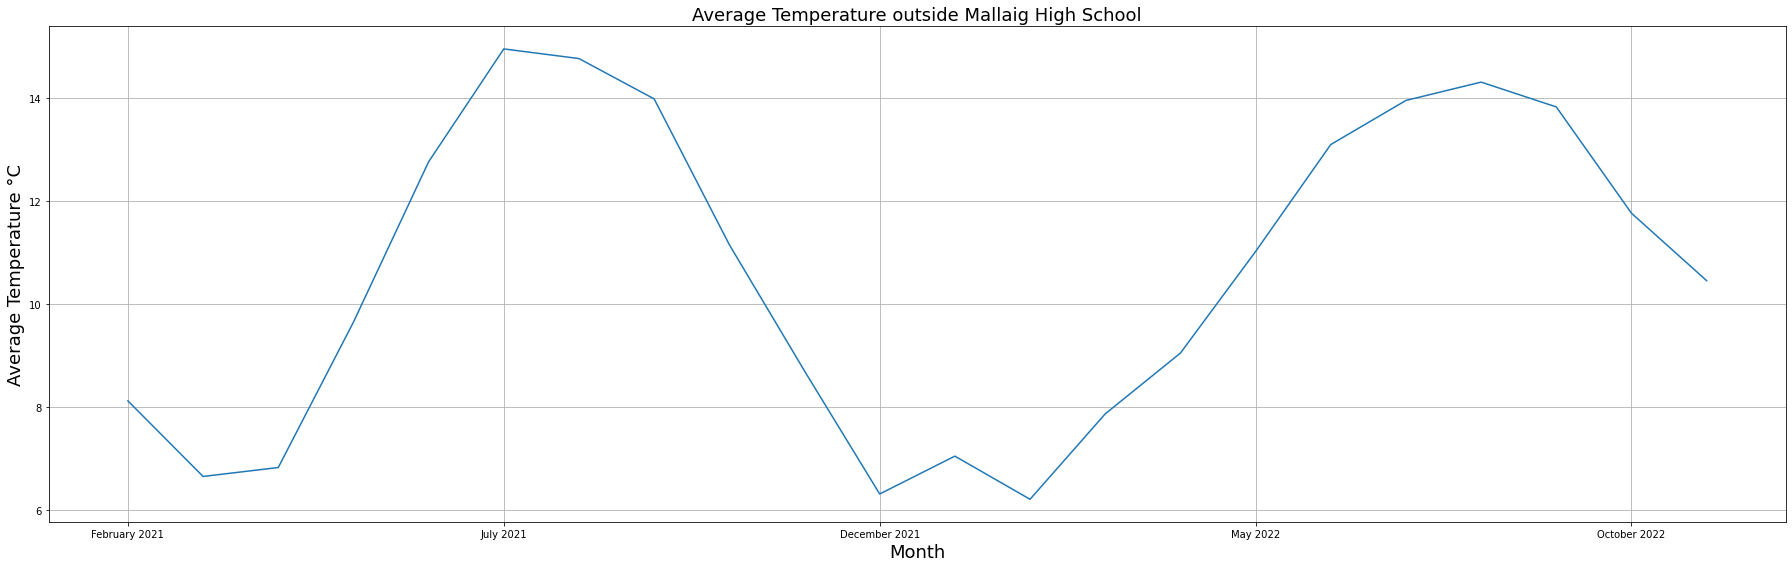

In [21]:
# Plot bar chart
dfm.plot.line(x = 'Month', y = 'Average Temperature', figsize=(25,8), grid = True, legend=False)

plt.title("Average Temperature outside Mallaig High School", fontsize = 18)
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Average Temperature °C", fontsize = 18)

plt.tight_layout()

plt.savefig('mhs_average_temperature_month', dpi = 200)